In [5]:
#|default_exp app

In [6]:
# Fails, doesn't go to conda env
%pip install -Uqq fastai

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Install fastai to conda env
# %conda install fastai::fastai

# Ran this in terminal instead


Retrieving notices: done
Channels:
 - defaults
 - fastai
 - conda-forge
Platform: osx-arm64
Solving environment: warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - nothing provides cymem 2.0.2 needed by fastai-1.0.9-py_1

Could not solve for environment specs
The following packages are incompatible
├─ fastai is installable with the potential options
│  ├─ fastai [1.0.39|1.0.40|...|2.7.9] would require
│  │  └─ spacy [ |<4 |>=2.0.18 ] with the potential options
│  │     ├─ spacy [2.3.5|2.3.7|...|3.7.2] would require
│  │     │  └─ python >=3.8,<3.9.0a0 , which can be installed;
│  │     ├─ spacy [2.3.5|2.3.7|...|3.8.2] would require
│  │     │  └─ python >=3.9,<3.10.0a0 , which can be installed;
│  │     ├─ spacy [3.3.0|3.3.1|...|3.8.2] would require
│  │     │  └─ python >=3.10,<3.11.0a0 , which can be installed;
│  │     ├─ spacy [3.3.1|3.4.4|3.5.3|3.7.2|3.8.2] would require
│  │     

In [1]:
#|export
from fastai.vision.all import *

# for image models
# import timm

# import gradio as gr

In [2]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    # regex on the filename to label the data
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224, method='squish'),
    # Passing in the Mac apple silicon device, instead of CPU
    device=default_device(1)
    )

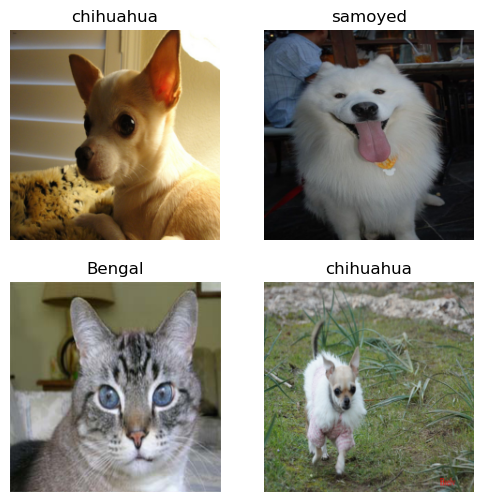

In [3]:
dls.show_batch(max_n=4)

In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/tjadams/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 20.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.526856,0.347120,0.113667,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.441337,0.380362,0.115697,00:59
1,0.239447,0.287283,0.081191,00:58
2,0.093656,0.267561,0.076455,00:58


In [5]:
learn.export('model.pkl')

In [6]:
#|export
learn = load_learner('model.pkl')

# I guess this is the set of label names?
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    # Create dictionary of categories to probability, each are arrays
    return dict(zip(categories, map(float,probs)))

In [9]:
#|export
import gradio as gr

#export
# image = gr.inputs.Image(shape=(192, 192))
# label = gr.outputs.Label()
image = gr.Image(height=192, width=192)
label = gr.Label()
examples = ['basset.jpg']
demo = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
demo.launch(inline=False)

# Here's my gradio v5 fix to broken fastai code :D
# with gr.Blocks() as demo:
#   gr.Markdown("Upload an image to see what kind of breed it is")
#   image = gr.Image(height=192, width=192)
#   button = gr.Button("Classify")
#   label = gr.Label()

#   button.click(fn=classify_image, inputs=image, outputs=label)

# demo.launch(inline=False)


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [10]:
# Preparing the Gradio code (cells prefixed with |export) for being deployed to Hugging Face

# My fix to fastai export
import nbdev
nbdev.export.nb_export('app.ipynb', 'generated', name='huggingface_app')
print('Export successful')


Export successful
